In [1]:
# ORR 21-231 Deaths by DOD and Report Date as of 04-09-21.xlsx

Analyzing cdc and state data to find out whether the state's policies were driven by facts or politics
Goals:
    1. What does the data tell us about Dec 13 when the state lift some restrictions
    2. look at the death data, hospitalizations, weekly trends, hotspots, incidence rate, death rate, positivity rate

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import datetime

# Analysis of death data
confirming whether reported deaths were lower than actual deaths

CONCLUSION: yes, there is a huge gap between reported deaths and actual deaths that lasted until February

<b>FINDING 1: There was an average of 17 day difference between the date a death occured and the date it was reported
<br>FINDING 2: Maximum delay occured in Graves County where it took 319 days to report a death
<br>FINDING 3: GRAVES, BOONE County reported unusually greater delays in reporting<br>
    FINDING 4: A fourth of the deaths were reported in 43 days or more
 <br> FINDING 5: A lot of deaths that occured in Nov, Dec were reported in March and April. Some of the cases took months to report<b>
<br>FINDING 6: There is something wrong with this data because the March 15th death was reported on March 16th but the data entry is on April 1

In [3]:
death_data=pd.read_excel("ORR 21 RVV - Deaths Dates and County - 06_07_2021.xlsx")

In [4]:
death_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   n                  7103 non-null   int64         
 1   county             7103 non-null   object        
 2   deceased_dt        7103 non-null   datetime64[ns]
 3   death_reported_dt  7103 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 222.1+ KB


In [5]:
death_data.head()

,n,county,deceased_dt,death_reported_dt
0,1,Bourbon,2020-03-15,2020-04-01
1,2,Kenton,2020-04-02,2020-04-06
2,3,Kenton,2020-03-28,2020-03-31
3,4,Jefferson,2020-03-18,2020-03-28
4,5,Anderson,2020-03-21,2020-04-02


In [6]:
death_data.sort_values('death_reported_dt')

,n,county,deceased_dt,death_reported_dt
15,16,Hopkins,2020-03-26,2020-03-26
5,6,Jefferson,2020-03-23,2020-03-27
3,4,Jefferson,2020-03-18,2020-03-28
19,20,Jefferson,2020-03-24,2020-03-28
12,13,Hopkins,2020-03-29,2020-03-29
...,...,...,...,...
7023,7024,Ohio,2021-05-25,2021-06-07
6957,6958,Butler,2021-05-02,2021-06-07
6523,6524,Logan,2021-02-10,2021-06-07
6967,6968,Letcher,2021-06-02,2021-06-07


In [7]:
death_data=death_data[["county", 'deceased_dt', 'death_reported_dt']]

In [8]:
death_by_date=death_data.groupby('deceased_dt').count().reset_index()
deaths_by_date=death_by_date.rename(columns={'county':'deaths', 'deceased_dt':'death_date'})
deaths_by_date = deaths_by_date[['death_date', 'deaths']]
deaths_by_date.sort_values("death_date")
deaths_by_date=deaths_by_date.rename(columns={'death_date':'date'})

In [9]:
death_by_reported_date=death_data.groupby('death_reported_dt').count().reset_index()
death_by_reported_date=death_by_reported_date.rename(columns={'county':'reported_deaths', 'death_reported_dt':'date'})
deaths_by_reported_date = death_by_reported_date[['date', 'reported_deaths']]
deaths_by_reported_date.tail()

,date,reported_deaths
427,2021-06-03,6
428,2021-06-04,9
429,2021-06-05,5
430,2021-06-06,7
431,2021-06-07,5


In [10]:
merged_df=pd.merge_ordered(deaths_by_date, deaths_by_reported_date)
merged_df=merged_df[['date', 'deaths', 'reported_deaths']]
merged_df=merged_df.fillna(0)

In [11]:
merged_df

,date,deaths,reported_deaths
0,2020-03-15,1.0,0.0
1,2020-03-18,1.0,0.0
2,2020-03-20,1.0,0.0
3,2020-03-21,1.0,0.0
4,2020-03-23,3.0,0.0
...,...,...,...
440,2021-06-03,2.0,6.0
441,2021-06-04,1.0,9.0
442,2021-06-05,0.0,5.0
443,2021-06-06,0.0,7.0


In [12]:
merged_df=merged_df.sort_values("date")

# merged_df['deaths_7DMA']= merged_df.deaths.rolling(window=7).mean().round()
# merged_df['reported_deaths_7DMA']= merged_df.reported_deaths.rolling(window=7).mean().round()

In [13]:
# plt.figure(figsize=(15,8))
# sns.lineplot(data=filtered_df, x="date", y="deaths")
# sns.lineplot(data=filtered_df, x="date", y="reported_deaths")

In [14]:
death_data["delay"] = death_data["death_reported_dt"] - death_data['deceased_dt']

In [15]:
death_data.sort_values("delay", ascending=False).head(30)

,county,deceased_dt,death_reported_dt,delay
4641,Jefferson,2020-03-20,2021-06-01,438 days
4637,Jefferson,2020-03-31,2021-06-01,427 days
6888,Bullitt,2020-04-07,2021-06-01,420 days
7100,Jefferson,2020-04-10,2021-06-01,417 days
6879,Christian,2020-04-16,2021-06-01,411 days
4634,Jefferson,2020-04-17,2021-06-01,410 days
144,Butler,2020-04-24,2021-06-01,403 days
4630,Jefferson,2020-04-26,2021-06-01,401 days
6861,Grayson,2020-04-30,2021-06-01,397 days
372,Muhlenberg,2020-05-03,2021-06-01,394 days


In [16]:
death_data.delay.median()

Timedelta('19 days 00:00:00')

In [17]:
death_data.describe()

,delay
count,7103
mean,46 days 01:37:55.151344502
std,65 days 10:08:13.684636754
min,0 days 00:00:00
25%,6 days 00:00:00
50%,19 days 00:00:00
75%,61 days 00:00:00
max,438 days 00:00:00


In [18]:
death_data.delay

0       17 days
1        4 days
2        3 days
3       10 days
4       12 days
         ...   
7098   154 days
7099   252 days
7100   417 days
7101   277 days
7102     3 days
Name: delay, Length: 7103, dtype: timedelta64[ns]

In [19]:
death_data['delay_in_days']=death_data.delay.astype(str).str.replace('days', '').astype(float)

<AxesSubplot:xlabel='delay_in_days', ylabel='Count'>

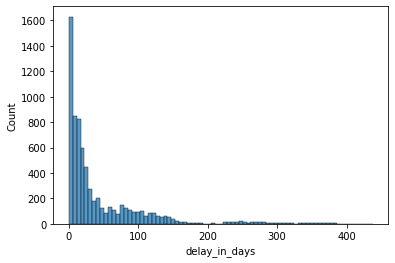

In [20]:
# Histogram of delay
sns.histplot(data=death_data, x='delay_in_days')


## COMPARISON BETWEEN REPORTED AND ACTUAL DEATHS

In [64]:
# death_data[['death_reported_dt', 'delay_in_days']].to_csv("delay_data.csv", index=False)
death_data.sort_values('delay_in_days')

,county,deceased_dt,death_reported_dt,delay,delay_in_days
43,Hopkins,2020-04-02,2020-04-02,0 days,0.0
215,Jackson,2020-05-06,2020-05-06,0 days,0.0
499,Clay,2020-06-02,2020-06-02,0 days,0.0
115,Daviess,2020-04-10,2020-04-10,0 days,0.0
319,Jefferson,2020-04-27,2020-04-27,0 days,0.0
...,...,...,...,...,...
6879,Christian,2020-04-16,2021-06-01,411 days,411.0
7100,Jefferson,2020-04-10,2021-06-01,417 days,417.0
6888,Bullitt,2020-04-07,2021-06-01,420 days,420.0
4637,Jefferson,2020-03-31,2021-06-01,427 days,427.0


In [22]:
# total count:6223 ranging across 373 days from March, 26, 2020 to April 09, 2021
death_data.county.count()

7103

<AxesSubplot:xlabel='death_reported_dt', ylabel='delay_in_days'>

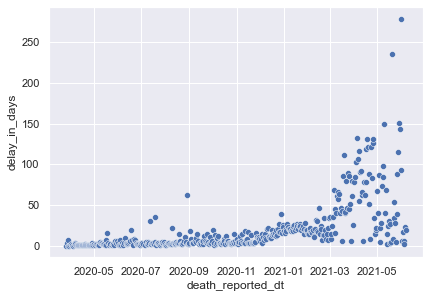

In [23]:
#group deaths by date
plt.figure(figsize=(6.7,4.6))

delay_timeline=death_data.groupby("death_reported_dt").delay_in_days.median().reset_index()
# delay_timeline = delay_timeline[delay_timeline.death_reported_dt > '2020-11-15']

sns.set_theme(style='darkgrid')
sns.scatterplot(x='death_reported_dt', y='delay_in_days', 
            data=delay_timeline)

In [24]:
delay_timeline.to_csv('delay_timeline.csv', index=False)

In [25]:
daily_deaths=pd.merge_ordered(merged_df,delay_timeline,right_on='death_reported_dt', left_on='date')

In [26]:
daily_deaths=daily_deaths[["date",'deaths', 'reported_deaths', 'delay_in_days']]

In [27]:
#final dataset here; save for graphics here
daily_deaths.fillna(0)

# daily_deaths.to_csv("daily_deaths.csv", index=False)

,date,deaths,reported_deaths,delay_in_days
0,2020-03-15,1.0,0.0,0.0
1,2020-03-18,1.0,0.0,0.0
2,2020-03-20,1.0,0.0,0.0
3,2020-03-21,1.0,0.0,0.0
4,2020-03-23,3.0,0.0,0.0
...,...,...,...,...
440,2021-06-03,2.0,6.0,17.0
441,2021-06-04,1.0,9.0,6.0
442,2021-06-05,0.0,5.0,2.0
443,2021-06-06,0.0,7.0,23.0


# Monthly Trends

In [28]:
daily_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 0 to 444
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             445 non-null    datetime64[ns]
 1   deaths           445 non-null    float64       
 2   reported_deaths  445 non-null    float64       
 3   delay_in_days    432 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 17.4 KB


In [29]:
#extract month and year for monthly analysis
daily_deaths['month_year']=pd.to_datetime(daily_deaths['date']).dt.to_period('M')

In [30]:
# monthly actual deaths
daily_deaths.groupby('month_year').deaths.sum().reset_index()

,month_year,deaths
0,2020-03,29.0
1,2020-04,242.0
2,2020-05,239.0
3,2020-06,174.0
4,2020-07,212.0
5,2020-08,308.0
6,2020-09,307.0
7,2020-10,540.0
8,2020-11,1077.0
9,2020-12,1691.0


In [31]:
#monthly reported deaths
daily_deaths.groupby('month_year').reported_deaths.sum().reset_index()

,month_year,reported_deaths
0,2020-03,12.0
1,2020-04,228.0
2,2020-05,190.0
3,2020-06,135.0
4,2020-07,170.0
5,2020-08,198.0
6,2020-09,241.0
7,2020-10,311.0
8,2020-11,423.0
9,2020-12,754.0


In [32]:
#during period of restrictions starting Nov.20 to Dec 13. 
#filter the dataset then run the analysis by grouping by date

deaths_targ_period=daily_deaths[(daily_deaths.date > '2020-11-19') & (daily_deaths.date < '2020-12-14')]

In [33]:
print('deaths during targetted period', deaths_targ_period.deaths.sum())
print('reported deaths during targetted period', deaths_targ_period.reported_deaths.sum())

deaths during targetted period 1184.0
reported deaths during targetted period 465.0


In [34]:
monthly_deaths=pd.merge(daily_deaths.groupby('month_year').deaths.sum().reset_index(), 
        daily_deaths.groupby('month_year').reported_deaths.sum().reset_index())

In [35]:
monthly_deaths['backlog'] = monthly_deaths['deaths'] - monthly_deaths['reported_deaths']
monthly_deaths['backlog_ratio'] = (monthly_deaths['deaths']/monthly_deaths['reported_deaths'])

In [36]:
# monthly_deaths.to_csv("monthly_deaths.csv", index=False)

In [37]:
daily_deaths[(daily_deaths.date > '2020-10-19') & (daily_deaths.date < '2020-11-20')].deaths.sum()

828.0

In [38]:
daily_deaths[(daily_deaths.date > '2020-10-19') & (daily_deaths.date < '2020-11-20')].reported_deaths.sum()

416.0

In [39]:
death_data[death_data.deceased_dt <'2020-09-01']

,county,deceased_dt,death_reported_dt,delay,delay_in_days
0,Bourbon,2020-03-15,2020-04-01,17 days,17.0
1,Kenton,2020-04-02,2020-04-06,4 days,4.0
2,Kenton,2020-03-28,2020-03-31,3 days,3.0
3,Jefferson,2020-03-18,2020-03-28,10 days,10.0
4,Anderson,2020-03-21,2020-04-02,12 days,12.0
...,...,...,...,...,...
7090,Jefferson,2020-08-31,2021-06-01,274 days,274.0
7094,Jefferson,2020-08-07,2021-05-30,296 days,296.0
7097,Warren,2020-08-26,2021-06-01,279 days,279.0
7100,Jefferson,2020-04-10,2021-06-01,417 days,417.0


# Cumulative deaths

In [40]:
merged_df['cum_deaths']=merged_df.deaths.cumsum()
merged_df['cum_rdeaths']=merged_df.reported_deaths.cumsum()

<AxesSubplot:xlabel='date'>

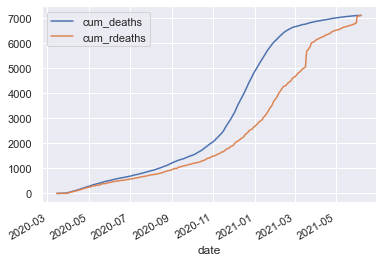

In [41]:
merged_df.plot(x='date', y=['cum_deaths', 'cum_rdeaths'])

In [42]:
merged_df[merged_df['date'] == '2020-10-19']

,date,deaths,reported_deaths,cum_deaths,cum_rdeaths
213,2020-10-19,25.0,9.0,1814.0,1326.0


In [43]:
merged_df[merged_df['date'] == '2020-11-19']

,date,deaths,reported_deaths,cum_deaths,cum_rdeaths
244,2020-11-19,52.0,30.0,2642.0,1742.0


In [44]:
merged_df[merged_df['date'] == '2020-12-13']

,date,deaths,reported_deaths,cum_deaths,cum_rdeaths
268,2020-12-13,51.0,15.0,3826.0,2207.0


In [45]:
# merged_df.to_csv("daily_deaths.csv", index=False)

In [46]:
merged_df[merged_df['date'] == '2020-10-31']

,date,deaths,reported_deaths,cum_deaths,cum_rdeaths
225,2020-10-31,18.0,9.0,2051.0,1485.0


In [47]:
merged_df[merged_df['date'] == '2020-12-01']

,date,deaths,reported_deaths,cum_deaths,cum_rdeaths
256,2020-12-01,40.0,35.0,3168.0,1943.0


In [48]:
merged_df[merged_df['date'] == '2020-12-23']

,date,deaths,reported_deaths,cum_deaths,cum_rdeaths
278,2020-12-23,73.0,26.0,4403.0,2466.0


In [49]:
merged_df[merged_df['date'] == '2020-12-31']

,date,deaths,reported_deaths,cum_deaths,cum_rdeaths
286,2020-12-31,51.0,39.0,4819.0,2662.0


In [50]:
merged_df[merged_df['date'] == '2021-01-31']

,date,deaths,reported_deaths,cum_deaths,cum_rdeaths
317,2021-01-31,25.0,31.0,6082.0,3745.0


In [51]:
merged_df.deaths.sum()

7103.0

In [52]:
merged_df

,date,deaths,reported_deaths,cum_deaths,cum_rdeaths
0,2020-03-15,1.0,0.0,1.0,0.0
1,2020-03-18,1.0,0.0,2.0,0.0
2,2020-03-20,1.0,0.0,3.0,0.0
3,2020-03-21,1.0,0.0,4.0,0.0
4,2020-03-23,3.0,0.0,7.0,0.0
...,...,...,...,...,...
440,2021-06-03,2.0,6.0,7102.0,7077.0
441,2021-06-04,1.0,9.0,7103.0,7086.0
442,2021-06-05,0.0,5.0,7103.0,7091.0
443,2021-06-06,0.0,7.0,7103.0,7098.0


In [53]:
merged_df['deaths_7DMA']= merged_df.deaths.rolling(window=7).mean().round()
merged_df['reported_deaths_7DMA']= merged_df.reported_deaths.rolling(window=7).mean().round()

In [54]:
# merged_df.to_csv("daily_deaths.csv", index=False)

In [55]:
merged_df.sort_values("reported_deaths")

,date,deaths,reported_deaths,cum_deaths,cum_rdeaths,deaths_7DMA,reported_deaths_7DMA
0,2020-03-15,1.0,0.0,1.0,0.0,NaN,NaN
106,2020-07-04,2.0,0.0,706.0,585.0,6.0,4.0
107,2020-07-05,14.0,0.0,720.0,585.0,7.0,4.0
72,2020-05-31,6.0,0.0,510.0,430.0,6.0,6.0
171,2020-09-07,13.0,0.0,1284.0,996.0,11.0,9.0
...,...,...,...,...,...,...,...
314,2021-01-28,22.0,69.0,5993.0,3611.0,35.0,44.0
370,2021-03-25,8.0,107.0,6819.0,5970.0,8.0,67.0
364,2021-03-19,6.0,192.0,6772.0,5694.0,5.0,106.0
438,2021-06-01,3.0,261.0,7098.0,7067.0,2.0,49.0


In [62]:
merged_df.sort_values("deaths_7DMA", ascending=False)

,date,deaths,reported_deaths,cum_deaths,cum_rdeaths,deaths_7DMA,reported_deaths_7DMA
278,2020-12-23,73.0,26.0,4403.0,2466.0,60.0,29.0
280,2020-12-25,58.0,11.0,4504.0,2530.0,58.0,27.0
281,2020-12-26,52.0,4.0,4556.0,2534.0,58.0,23.0
263,2020-12-08,54.0,20.0,3575.0,2102.0,58.0,23.0
277,2020-12-22,57.0,28.0,4330.0,2440.0,58.0,29.0
...,...,...,...,...,...,...,...
1,2020-03-18,1.0,0.0,2.0,0.0,NaN,NaN
2,2020-03-20,1.0,0.0,3.0,0.0,NaN,NaN
3,2020-03-21,1.0,0.0,4.0,0.0,NaN,NaN
4,2020-03-23,3.0,0.0,7.0,0.0,NaN,NaN


In [70]:
merged_df[(merged_df.date == '2020-10-31')]

,date,deaths,reported_deaths,cum_deaths,cum_rdeaths,deaths_7DMA,reported_deaths_7DMA
225,2020-10-31,18.0,9.0,2051.0,1485.0,19.0,12.0


In [92]:
merged_df[merged_df.date == '2020-12-31']

,date,deaths,reported_deaths,cum_deaths,cum_rdeaths,deaths_7DMA,reported_deaths_7DMA
286,2020-12-31,51.0,39.0,4819.0,2662.0,53.0,20.0


In [68]:
2768-1177

1591

In [83]:
death_data[(death_data.deceased_dt > '2020-10-31') & (death_data.deceased_dt < '2021-01-01')].count()

county               2768
deceased_dt          2768
death_reported_dt    2768
delay                2768
delay_in_days        2768
dtype: int64

In [84]:
death_data[(death_data.death_reported_dt > '2020-10-31') & (death_data.death_reported_dt < '2021-01-01')].count()

county               1177
deceased_dt          1177
death_reported_dt    1177
delay                1177
delay_in_days        1177
dtype: int64

In [88]:
death_data[(death_data.deceased_dt < '2021-01-01')].count()

county               4819
deceased_dt          4819
death_reported_dt    4819
delay                4819
delay_in_days        4819
dtype: int64

In [90]:
death_data[(death_data.death_reported_dt < '2020-12-31')].count()

county               2623
deceased_dt          2623
death_reported_dt    2623
delay                2623
delay_in_days        2623
dtype: int64